In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease,Unnamed: 14
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2,NaN
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1,NaN
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2,NaN
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1,NaN
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1,NaN


In [5]:
df.columns

Index(['age', 'sex', 'pain type', 'BP', 'cholestrol', 'fbs', 'resting ecg',
       'max heart rate', 'exercise angina', 'ST depression', 'ST slope',
       'flouroscopy coloured', 'thal', 'heart disease', 'Unnamed: 14'],
      dtype='object')

In [6]:
df = df.drop(['Unnamed: 14'], axis=1)

In [7]:
df.head()

,age,sex,pain type,BP,cholestrol,fbs,resting ecg,max heart rate,exercise angina,ST depression,ST slope,flouroscopy coloured,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [8]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=3)
dt_default.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [39]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot, graphviz

# Putting features
features = list(X.columns[0:])
features

['age',
 'sex',
 'pain type',
 'BP',
 'cholestrol',
 'fbs',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'ST depression',
 'ST slope',
 'flouroscopy coloured',
 'thal']

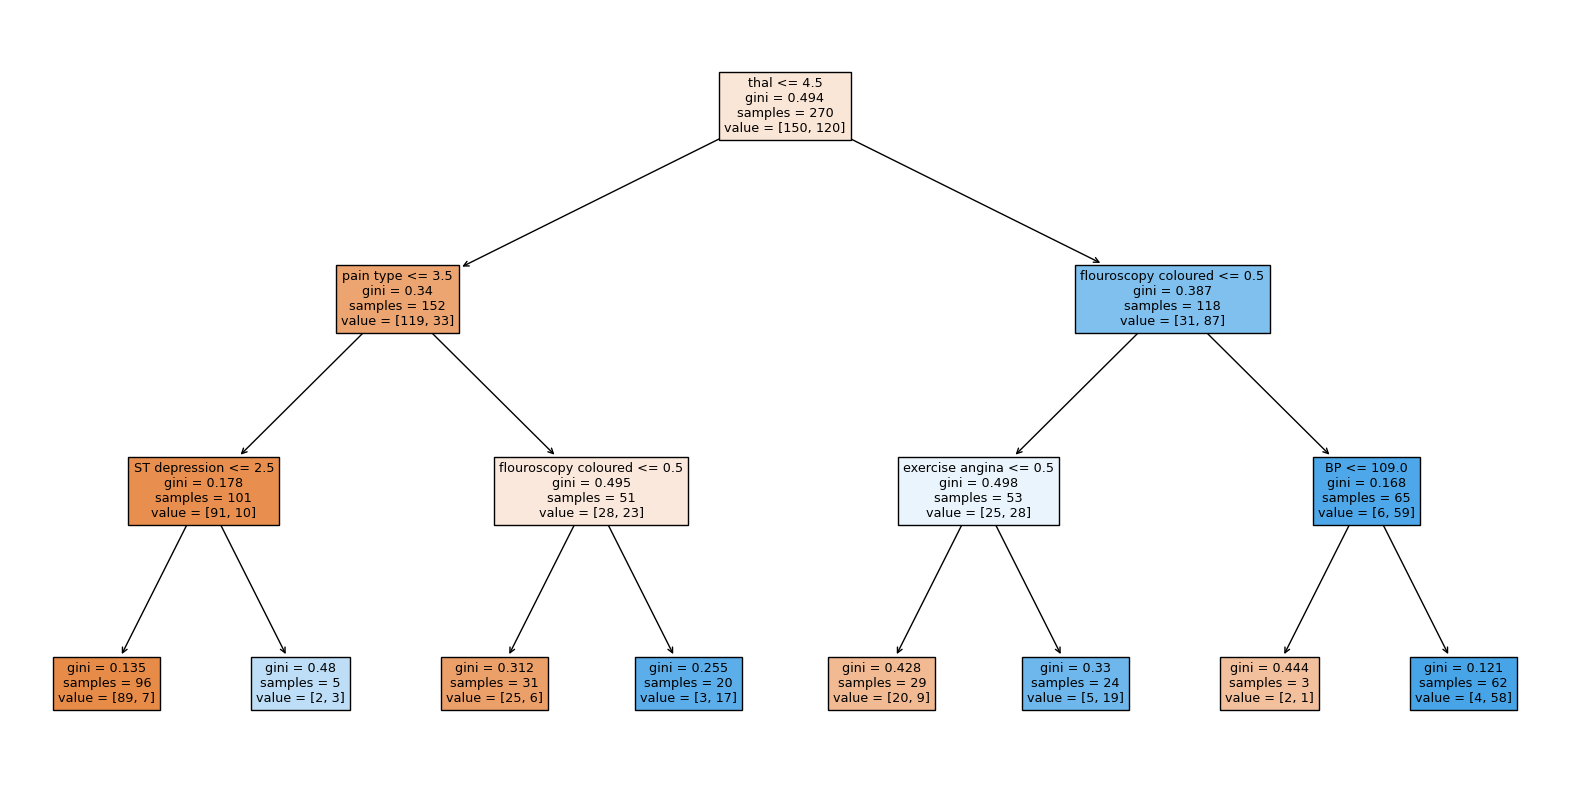

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_default, feature_names=features, filled=True)
plt.show()

In [43]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
graph[0].write_pdf("dt_heartdisease.pdf")